# Actividad 4.2

## Importamos Librerías

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Cargamos el Archivo en un DataFrame

In [134]:
dfc = pd.read_csv('DataAnalyticsCat.csv')
dfc = dfc.drop(columns=['Unnamed: 0'])
dfc.head()

,administrador,usuario,presionó botón correcto,tiempo de interacción,mini juego,número de interacción por lección,color presionado,dificultad,fecha,juego,auto push,tiempo de lección,tiempo de sesión
0,nicolas,nicolas,Si,5.399169,Despegue,1.0,blue,Episodio 1,25/01/2024 09:26,Astro,No,0.0,0.0
1,nicolas,nicolas,No,1.283400,Despegue,2.0,violet,Episodio 1,25/01/2024 09:26,Astro,No,0.0,0.0
2,nicolas,nicolas,Si,2.700226,Despegue,3.0,green,Episodio 1,25/01/2024 09:26,Astro,No,0.0,0.0
3,nicolas,nicolas,No,3.050262,Despegue,4.0,green,Episodio 1,25/01/2024 09:26,Astro,No,0.0,0.0
4,nicolas,nicolas,No,4.750256,Despegue,5.0,green,Episodio 1,25/01/2024 09:26,Astro,No,0.0,0.0


In [135]:
dfn = pd.read_csv('DataAnalyticsNum.csv')
dfn = dfn.drop(columns=['Unnamed: 0'])
dfn.head()

,administrador,usuario,presionó botón correcto,tiempo de interacción,mini juego,número de interacción por lección,color presionado,dificultad,fecha,juego,auto push,tiempo de lección,tiempo de sesión
0,2,3,1,5.399169,9,1.0,4,1,25/01/2024 09:26,1,1,0.0,0.0
1,2,3,2,1.283400,9,2.0,1,1,25/01/2024 09:26,1,1,0.0,0.0
2,2,3,1,2.700226,9,3.0,2,1,25/01/2024 09:26,1,1,0.0,0.0
3,2,3,2,3.050262,9,4.0,2,1,25/01/2024 09:26,1,1,0.0,0.0
4,2,3,2,4.750256,9,5.0,2,1,25/01/2024 09:26,1,1,0.0,0.0


## Preprocesamiento Nulos

In [136]:
#Eliminar columna fecha
dfn = dfn.drop(columns=['fecha'])
dfc = dfc.drop(columns=['fecha'])

In [137]:
#Verificamos Nulos
dfc.isnull().sum()

administrador                        0
usuario                              0
presionó botón correcto              0
tiempo de interacción                0
mini juego                           0
número de interacción por lección    0
color presionado                     0
dificultad                           0
juego                                0
auto push                            0
tiempo de lección                    0
tiempo de sesión                     0
dtype: int64

In [138]:
#Verificamos Nulos
dfn.isnull().sum()

administrador                        0
usuario                              0
presionó botón correcto              0
tiempo de interacción                0
mini juego                           0
número de interacción por lección    0
color presionado                     0
dificultad                           0
juego                                0
auto push                            0
tiempo de lección                    0
tiempo de sesión                     0
dtype: int64

## Analizar la correlación logística que existe entre las variables dicotómicas

### HeatMap

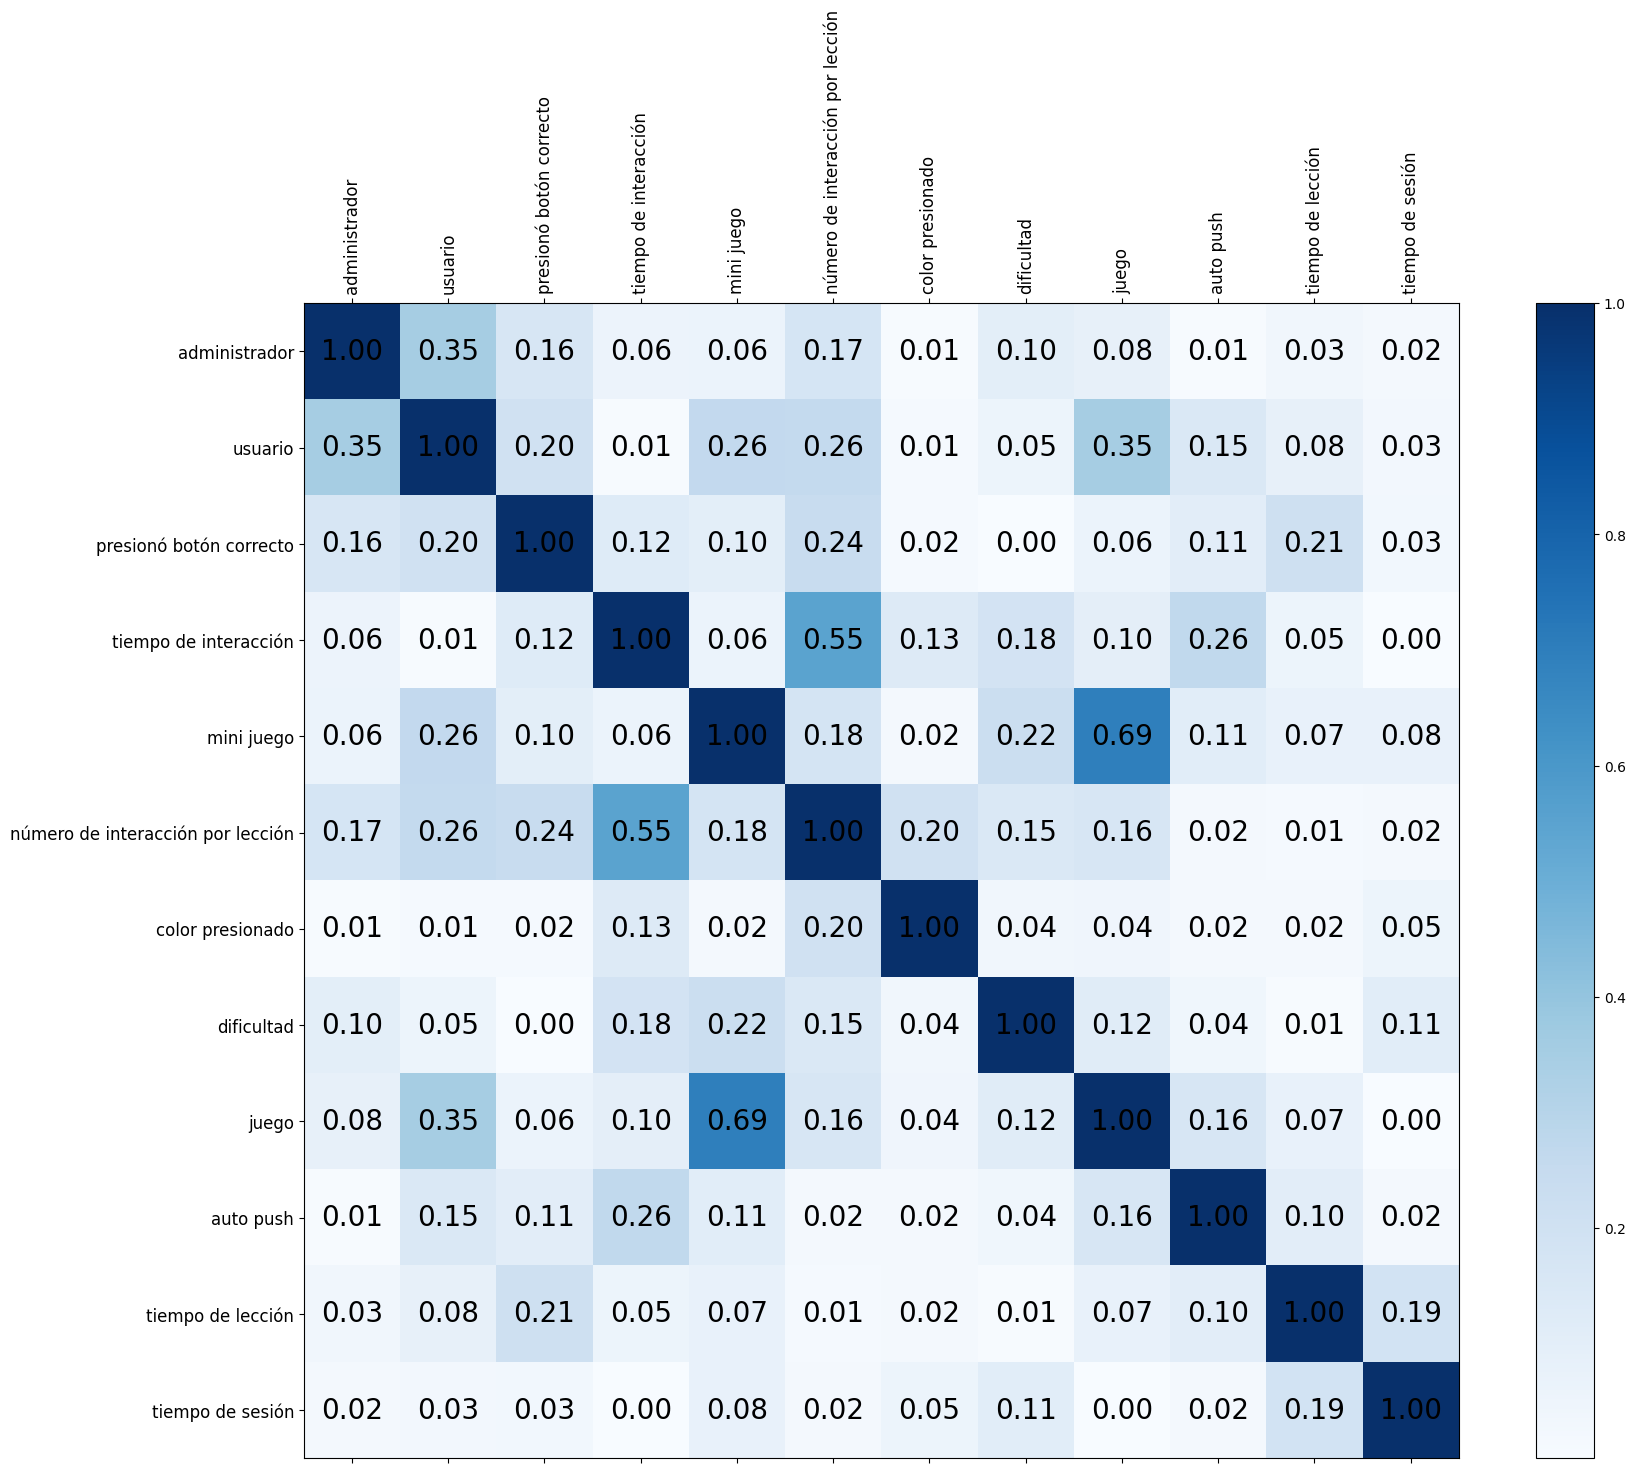

In [139]:
Corr_Factors = dfn.corr()
Corr_Factors = abs(Corr_Factors)
fig, ax = plt.subplots(figsize=(20, 15))
cax = ax.matshow(Corr_Factors, cmap="Blues")
fig.colorbar(cax)

# Añadir anotaciones manualmente
for i in range(Corr_Factors.shape[0]):
    for j in range(Corr_Factors.shape[1]):
        ax.text(j, i, f"{Corr_Factors.iloc[i, j]:.2f}", 
               ha="center", va="center", fontsize=20)

plt.xticks(range(len(Corr_Factors.columns)), Corr_Factors.columns, rotation=90, fontsize=12)
plt.yticks(range(len(Corr_Factors.index)), Corr_Factors.index, fontsize=12)
plt.show()

## Función Análisis de Métricas

In [140]:
def analisis_metricas(Vars_Indep, Var_Dep):
    #Redefinimos las variables
    X= Vars_Indep
    y= Var_Dep

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= None)

    #Se escalan todos los datos
    escalar = StandardScaler()

    #Para realizar el escalamiento de las variables "X" tanto de entrenamiento como de prueba, utilizaremos fit_transform
    X_train = escalar.fit_transform(X_train)
    X_test = escalar.transform(X_test)

    #Definimos el algoritmo a utilizar
    from sklearn.linear_model import LogisticRegression
    algoritmo = LogisticRegression()

    #Entrenamos el modelo
    algoritmo.fit(X_train, y_train)

    #Realizamos una predicción
    y_pred = algoritmo.predict(X_test)

    #Verifico la matriz de Confusión
    from sklearn.metrics import confusion_matrix
    matriz = confusion_matrix(y_test, y_pred)
    True_Positive = matriz[0, 0]
    True_Negative = matriz[1, 1]
    False_Positive = matriz[0, 1]
    False_Negative = matriz[1, 0]

    #Graficar Matriz de Confusión
    plt.figure(figsize=(10, 6))
    sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.text(1, 1, f'True Negatives: {True_Negative}', ha='left', va='top', color='black', fontsize=14)
    plt.text(1, 0, f'False Positives: {False_Positive}', ha='left', va='top', color='black', fontsize=14)
    plt.text(0, 1, f'False Negatives: {False_Negative}', ha='left', va='top', color='black', fontsize=14)
    plt.text(0, 0, f'True Positives: {True_Positive}', ha='left', va='top', color='black', fontsize=14)
    plt.show()

    #Defino el objetivo a calcular
    y_objetivo = np.unique(y)
    objetivo1 = y_objetivo[0]
    objetivo2 = y_objetivo[1]
    
    #Calculo la precisión del modelo
    from sklearn.metrics import precision_score
    precision1 = precision_score(y_test, y_pred, average='binary', pos_label=objetivo1)
    print(f'Precisión del modelo {objetivo1}:') 
    print(round(precision1, 4))

    precision2 = precision_score(y_test, y_pred, average='binary', pos_label=objetivo2)
    print(f'Precisión del modelo {objetivo2}:') 
    print(round(precision2, 4))

    #Calculo la exactitud del modelo
    from sklearn.metrics import accuracy_score

    exactitud = accuracy_score(y_test, y_pred)
    print('Exactitud del modelo:')
    print(round(exactitud, 4))

    #Calculo la sensibilidad del modelo
    from sklearn.metrics import recall_score
    sensibilidad1 = recall_score(y_test, y_pred, average='binary', pos_label=objetivo1)
    print(f'Sensibilidad del modelo {objetivo1}:')
    print(round(sensibilidad1, 4))

    sensibilidad2 = recall_score(y_test, y_pred, average='binary', pos_label=objetivo2)
    print(f'Sensibilidad del modelo {objetivo2}:')
    print(round(sensibilidad2, 4))

    #Calculo el F1 Score del modelo
    from sklearn.metrics import f1_score
    f1_1 = f1_score(y_test, y_pred, average='binary', pos_label=objetivo1)
    print(f'F1 Score del modelo {objetivo1}:')
    print(round(f1_1, 4))

    f1_2 = f1_score(y_test, y_pred, average='binary', pos_label=objetivo2)
    print(f'F1 Score del modelo {objetivo2}:')
    print(round(f1_2, 4))

## Modelo Botón Correcto

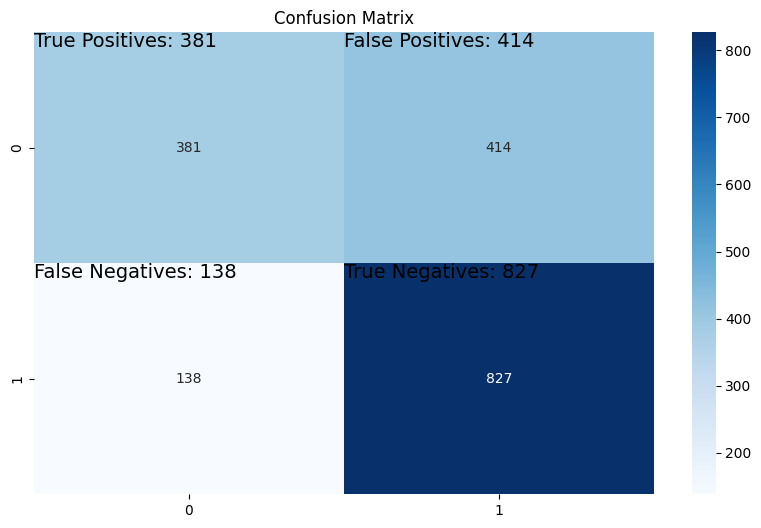

Precisión del modelo No:
0.7341
Precisión del modelo Si:
0.6664
Exactitud del modelo:
0.6864
Sensibilidad del modelo No:
0.4792
Sensibilidad del modelo Si:
0.857
F1 Score del modelo No:
0.5799
F1 Score del modelo Si:
0.7498


In [141]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep = dfn[['número de interacción por lección', 'tiempo de lección', 'usuario']]
Var_Dep = dfc['presionó botón correcto']

boton_correcto = analisis_metricas(Vars_Indep, Var_Dep)
boton_correcto

## Modelo Juego

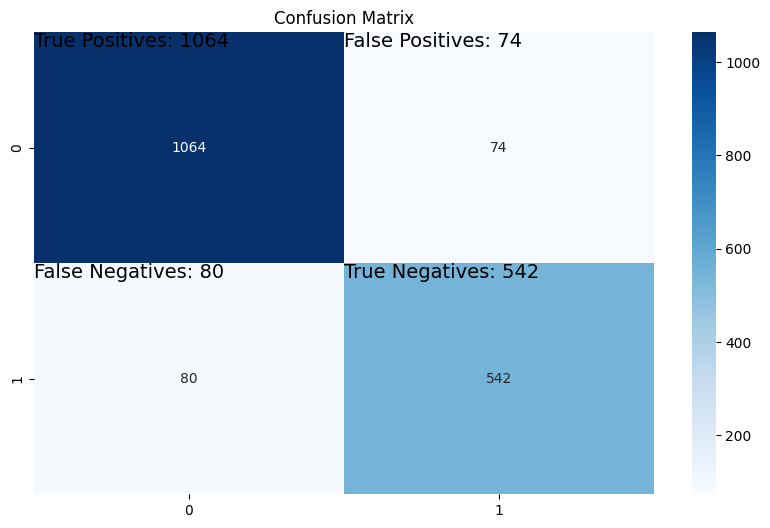

Precisión del modelo Astro:
0.9301
Precisión del modelo Cadetes:
0.8799
Exactitud del modelo:
0.9125
Sensibilidad del modelo Astro:
0.935
Sensibilidad del modelo Cadetes:
0.8714
F1 Score del modelo Astro:
0.9325
F1 Score del modelo Cadetes:
0.8756


In [142]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep = dfn[['tiempo de interacción', 'mini juego', 'número de interacción por lección']]
Var_Dep = dfc['juego']

juego = analisis_metricas(Vars_Indep, Var_Dep)
juego

## Modelo Auto Push

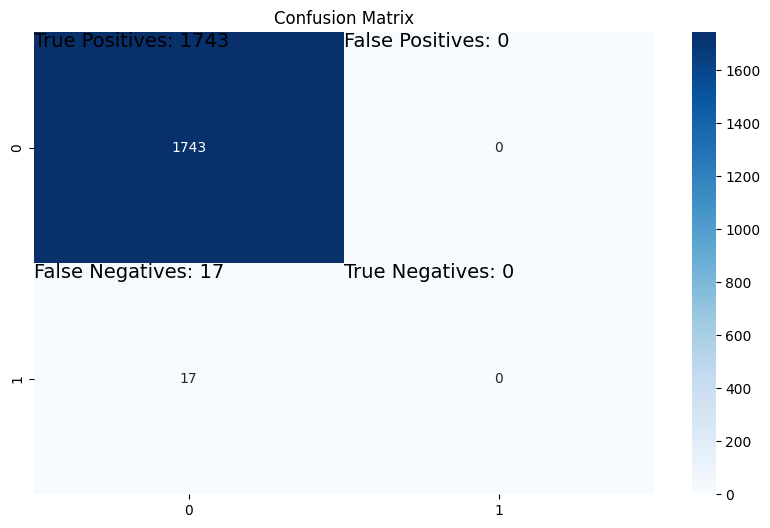

Precisión del modelo No:
0.9903
Precisión del modelo Si:
0.0
Exactitud del modelo:
0.9903
Sensibilidad del modelo No:
1.0
Sensibilidad del modelo Si:
0.0
F1 Score del modelo No:
0.9951
F1 Score del modelo Si:
0.0


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [143]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep = dfn[['mini juego', 'usuario', 'usuario']]
Var_Dep = dfc['auto push']

auto_push = analisis_metricas(Vars_Indep, Var_Dep)
auto_push

## Modelo Color Presionado

### Blue

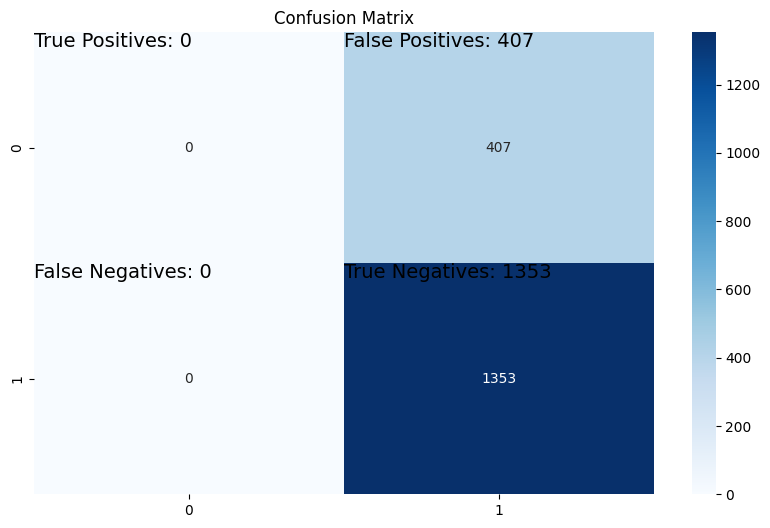

Precisión del modelo blue:
0.0
Precisión del modelo no blue:
0.7688
Exactitud del modelo:
0.7688
Sensibilidad del modelo blue:
0.0
Sensibilidad del modelo no blue:
1.0
F1 Score del modelo blue:
0.0
F1 Score del modelo no blue:
0.8693


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [144]:
#Volvemos variables a dicotómicas
blue = dfc['color presionado'].replace(['green', 'red', 'violet', 'yellow'], 'no blue')

#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep = dfn[['número de interacción por lección', 'tiempo de interacción', 'tiempo de sesión']]
Var_Dep = blue

color_blue = analisis_metricas(Vars_Indep, Var_Dep)
color_blue


### Green

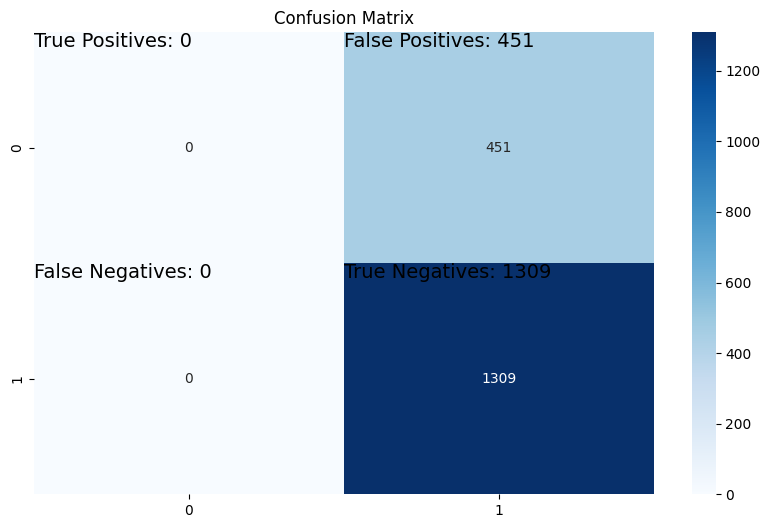

Precisión del modelo green:
0.0
Precisión del modelo no green:
0.7438
Exactitud del modelo:
0.7438
Sensibilidad del modelo green:
0.0
Sensibilidad del modelo no green:
1.0
F1 Score del modelo green:
0.0
F1 Score del modelo no green:
0.853


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [145]:
#Volvemos variables a dicotómicas
green = dfc['color presionado'].replace(['blue', 'red', 'violet', 'yellow'], 'no green')

#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep = dfn[['número de interacción por lección', 'tiempo de interacción', 'tiempo de sesión']]
Var_Dep = green

color_green = analisis_metricas(Vars_Indep, Var_Dep)
color_green

### Red

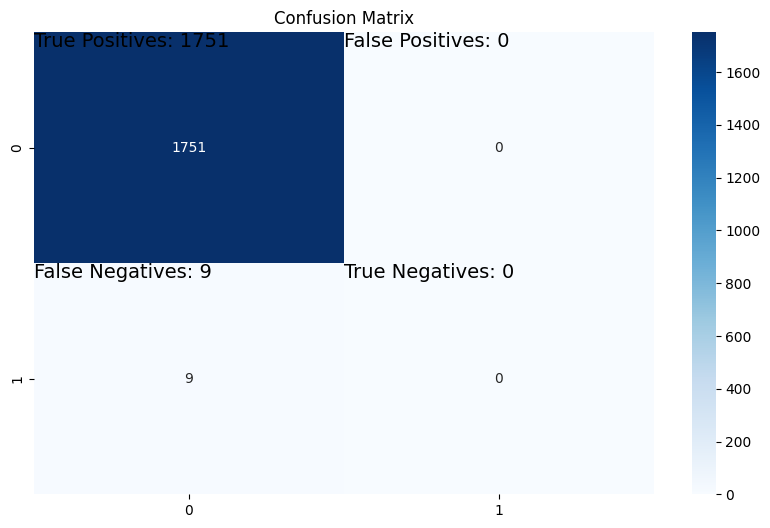

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precisión del modelo no red:
0.9949
Precisión del modelo red:
0.0
Exactitud del modelo:
0.9949
Sensibilidad del modelo no red:
1.0
Sensibilidad del modelo red:
0.0
F1 Score del modelo no red:
0.9974
F1 Score del modelo red:
0.0


In [146]:
#Volvemos variables a dicotómicas
red = dfc['color presionado'].replace(['blue', 'green', 'violet', 'yellow'], 'no red')

#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep = dfn[['número de interacción por lección', 'tiempo de interacción', 'tiempo de sesión']]
Var_Dep = red

color_red = analisis_metricas(Vars_Indep, Var_Dep)
color_red

### Violet

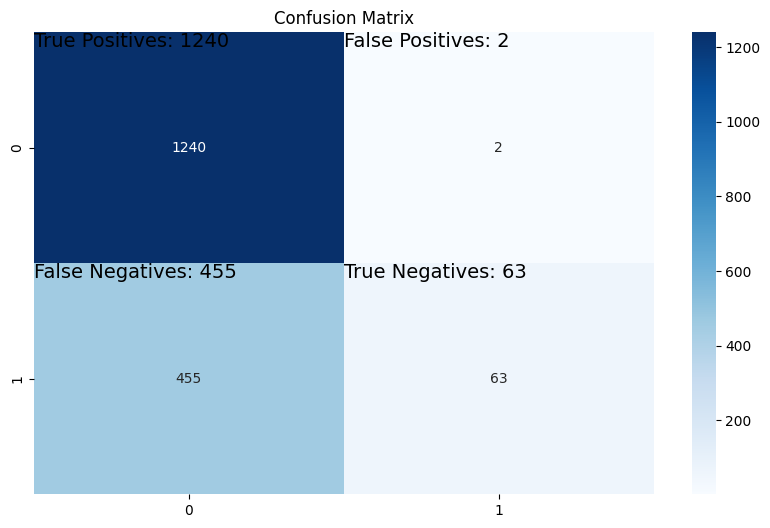

Precisión del modelo no violet:
0.7316
Precisión del modelo violet:
0.9692
Exactitud del modelo:
0.7403
Sensibilidad del modelo no violet:
0.9984
Sensibilidad del modelo violet:
0.1216
F1 Score del modelo no violet:
0.8444
F1 Score del modelo violet:
0.2161


In [147]:
#Volvemos variables a dicotómicas
violet = dfc['color presionado'].replace(['blue', 'red', 'green', 'yellow'], 'no violet')

#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep = dfn[['número de interacción por lección', 'tiempo de interacción', 'tiempo de sesión']]
Var_Dep = violet

color_violet = analisis_metricas(Vars_Indep, Var_Dep)
color_violet

### Yellow

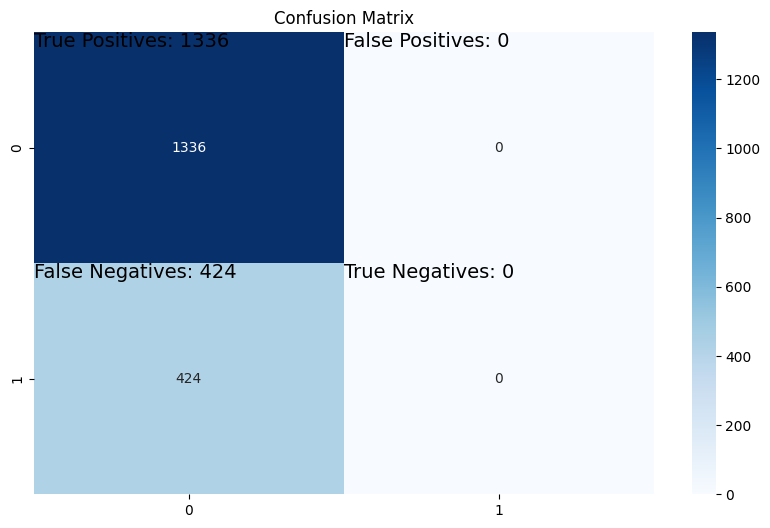

Precisión del modelo no yellow:
0.7591
Precisión del modelo yellow:
0.0
Exactitud del modelo:
0.7591
Sensibilidad del modelo no yellow:
1.0
Sensibilidad del modelo yellow:
0.0
F1 Score del modelo no yellow:
0.863
F1 Score del modelo yellow:
0.0


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [148]:
#Volvemos variables a dicotómicas
yellow = dfc['color presionado'].replace(['blue', 'red', 'violet', 'green'], 'no yellow')

#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep = dfn[['número de interacción por lección', 'tiempo de interacción', 'tiempo de sesión']]
Var_Dep = yellow

color_yellow = analisis_metricas(Vars_Indep, Var_Dep)
color_yellow

## Modelo Dificultad

### Episodio 3

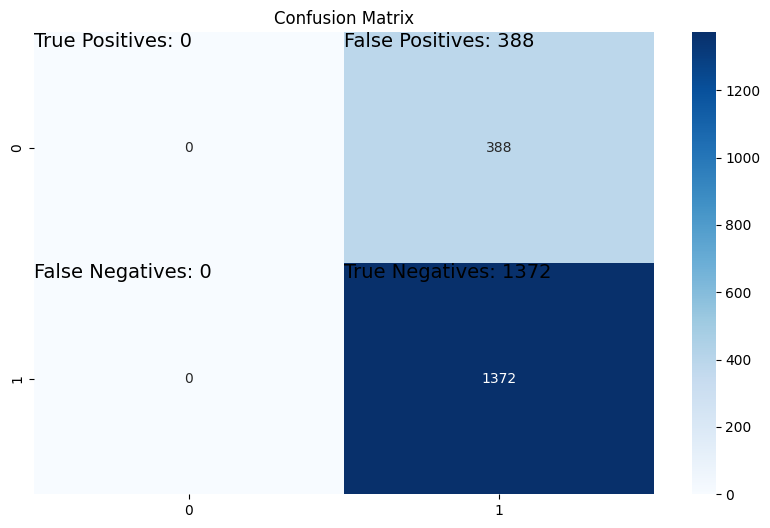

Precisión del modelo Episodio 3:
0.0
Precisión del modelo No Episodio 3:
0.7795
Exactitud del modelo:
0.7795
Sensibilidad del modelo Episodio 3:
0.0
Sensibilidad del modelo No Episodio 3:
1.0


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


F1 Score del modelo Episodio 3:
0.0
F1 Score del modelo No Episodio 3:
0.8761


In [149]:
#Volvemos variables a dicotómicas
episodio_3 = dfc['dificultad'].replace(['Episodio 1', 'Episodio 2', 'Episodio 4'], 'No Episodio 3')

#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep = dfn[['número de interacción por lección', 'tiempo de interacción', 'mini juego']]
Var_Dep = episodio_3

dificultad_3 = analisis_metricas(Vars_Indep, Var_Dep)
dificultad_3

## Modelo Mini Juego

### Asteroides

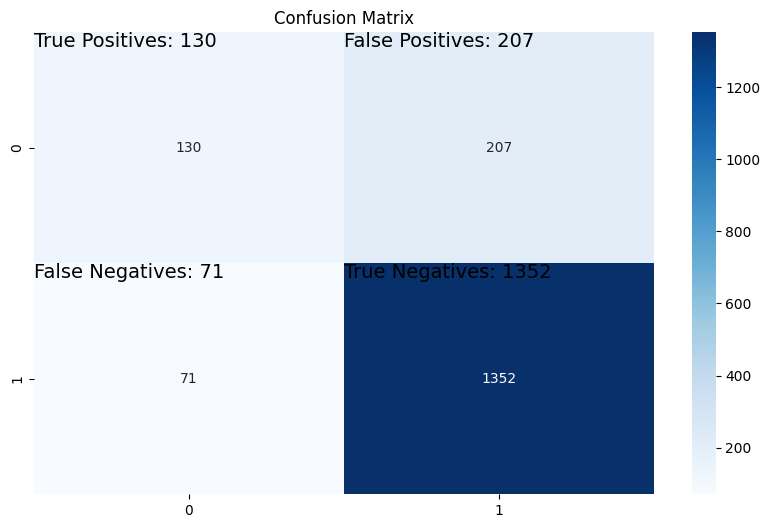

Precisión del modelo Asteroides:
0.6468
Precisión del modelo No asteroides:
0.8672
Exactitud del modelo:
0.842
Sensibilidad del modelo Asteroides:
0.3858
Sensibilidad del modelo No asteroides:
0.9501
F1 Score del modelo Asteroides:
0.4833
F1 Score del modelo No asteroides:
0.9068


In [150]:
#Volvemos variables a dicotómicas
asteroides = dfc['mini juego'].replace(['Despegue', 'Estrellas', 'Gusanos', 'Restaurante',
       'sonidos y animales', 'animales y colores', 'figuras y colores',
       'partes del cuerpo', 'MiniGame_1', 'MiniGame_3', 'MiniGame_0',
       'MiniGame_2'], 'No asteroides')

#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep = dfn[['usuario', 'juego', 'dificultad']]
Var_Dep = asteroides

minijuego_asteroides = analisis_metricas(Vars_Indep, Var_Dep)
minijuego_asteroides

### Sonidos y Animales

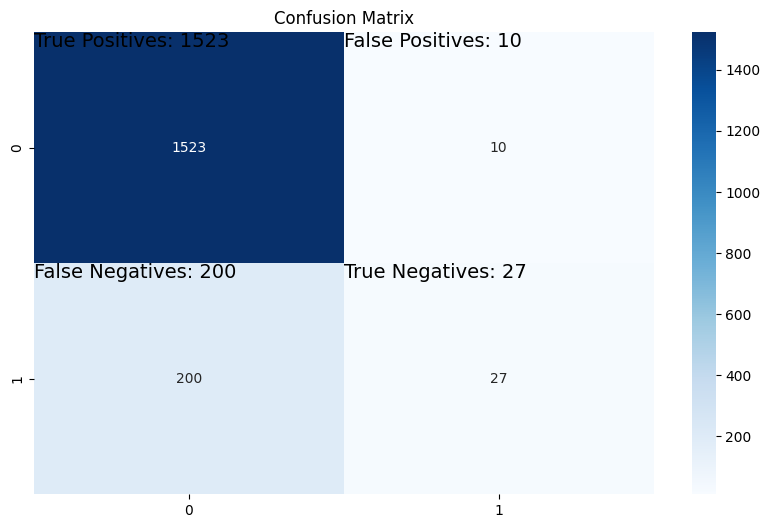

Precisión del modelo No sonidos y animales:
0.8839
Precisión del modelo sonidos y animales:
0.7297
Exactitud del modelo:
0.8807
Sensibilidad del modelo No sonidos y animales:
0.9935
Sensibilidad del modelo sonidos y animales:
0.1189
F1 Score del modelo No sonidos y animales:
0.9355
F1 Score del modelo sonidos y animales:
0.2045


In [151]:
#Volvemos variables a dicotómicas
sonidos_y_animales = dfc['mini juego'].replace(['Despegue', 'Asteroides', 'Estrellas', 'Gusanos', 'Restaurante',
       'animales y colores', 'figuras y colores',
       'partes del cuerpo', 'MiniGame_1', 'MiniGame_3', 'MiniGame_0',
       'MiniGame_2'], 'No sonidos y animales')

#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep = dfn[['usuario', 'juego', 'dificultad']]
Var_Dep = sonidos_y_animales

minijuego_sonidos_y_animales = analisis_metricas(Vars_Indep, Var_Dep)
minijuego_sonidos_y_animales

## Modelo Número de Interacción

### Número de Interacciones: 4

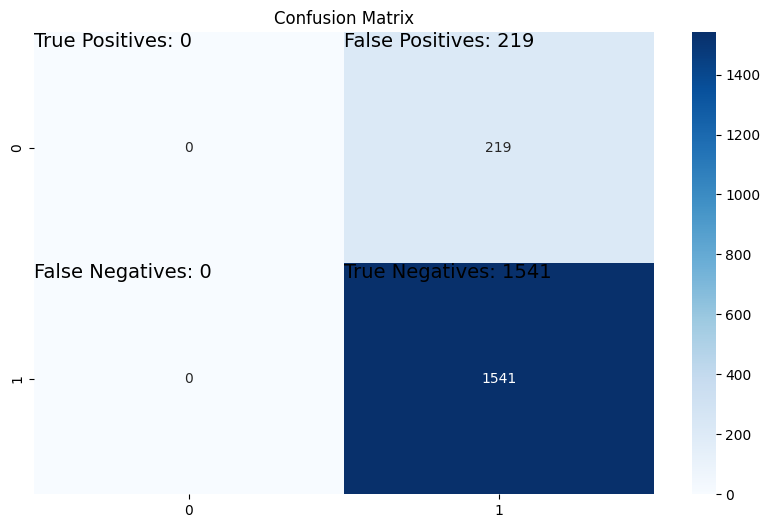

Precisión del modelo 4:
0.0
Precisión del modelo otra:
0.8756
Exactitud del modelo:
0.8756
Sensibilidad del modelo 4:
0.0
Sensibilidad del modelo otra:
1.0
F1 Score del modelo 4:
0.0
F1 Score del modelo otra:
0.9337


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [152]:
#Volvemos variables a dicotómicas
#Convertir la columna 'número de interacción por lección' a string
interacciones = dfc['número de interacción por lección'].astype(str)

#Reemplazar los valores de la columna 'número de interacción por lección' con '4' y 'otra'
interacciones_4 = interacciones.replace({'4.0': '4'})
interacciones_4 = interacciones_4.replace(interacciones_4[interacciones_4 != '4'].unique(), 'otra')

#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep = dfn[['usuario', 'tiempo de interacción', 'presionó botón correcto']]
Var_Dep = interacciones_4

num_interacciones_4 = analisis_metricas(Vars_Indep, Var_Dep)
num_interacciones_4

## Modelo Usuarios

### Rene

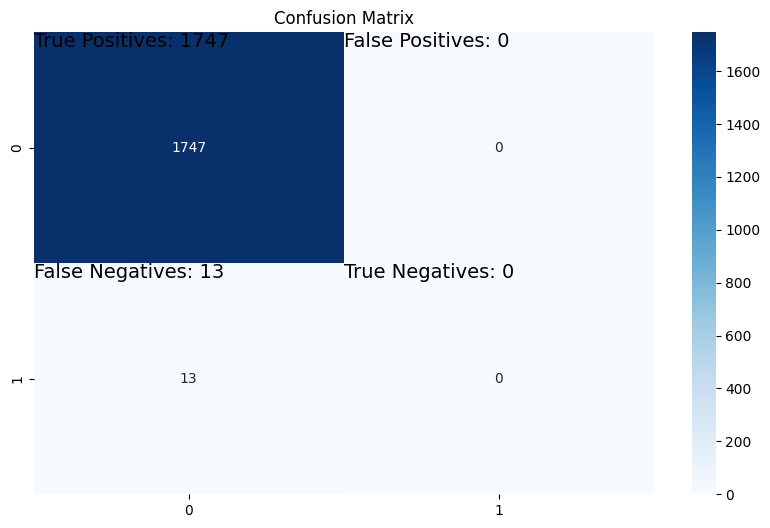

Precisión del modelo No Rene:
0.9926
Precisión del modelo RENE :
0.0
Exactitud del modelo:
0.9926
Sensibilidad del modelo No Rene:
1.0
Sensibilidad del modelo RENE :
0.0
F1 Score del modelo No Rene:
0.9963
F1 Score del modelo RENE :
0.0


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [153]:
#Volvemos variables a dicotómicas
rene = dfc['usuario'].replace(['nicolas', 'AUSTIN', 'LEONARDO', 'IKER BENJAMIN', 'KYTZIA',
       'YAEL DAVID', 'DENISSE', 'SERGIO ANGEL', 'erick ', 'CONCEPCION',
       'JOSHUA', 'VALENTIN', 'CARLOS ENRIQUE', 'JOSE IAN',
       'ERICK OSVALDO', 'INGRID', 'CARLOS ABEL', 'jesus eduardo',
       'ramiro isai', 'JOSE IGNACIO TADEO', 'JESUS ALEJANDRO',
       'ARLETT', 'ASHLEY ', 'BENJAMIN', 'IRVING ', 'YEREMI YAZMIN ',
       'ADRIAN ', 'ALEIDA', 'NICOLAS |', 'LEONARDO ', 'JOSE JAVIER ',
       'MA DEL ROSARIO ', 'ESMERALDA'], 'No Rene')

#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep = dfn[['mini juego', 'juego', 'número de interacción por lección', 'administrador']]
Var_Dep = rene

usuario_rene = analisis_metricas(Vars_Indep, Var_Dep)
usuario_rene

### Erick Osvaldo

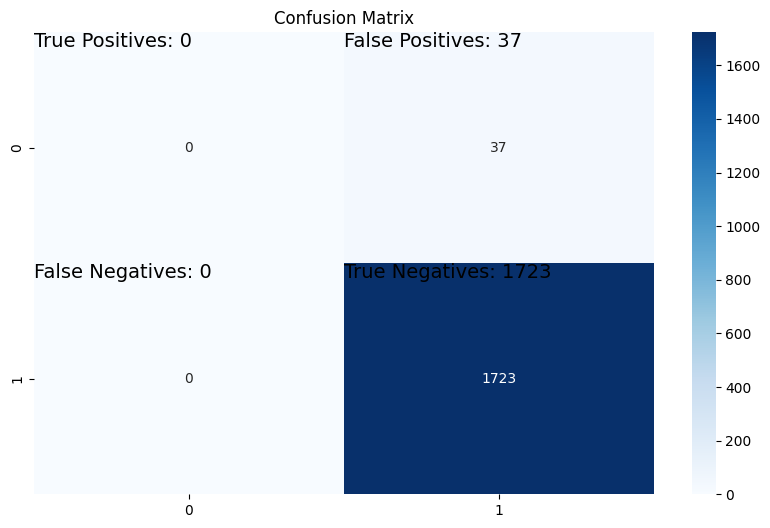

Precisión del modelo ERICK OSVALDO:
0.0
Precisión del modelo No Erick Osvaldo:
0.979
Exactitud del modelo:
0.979
Sensibilidad del modelo ERICK OSVALDO:
0.0
Sensibilidad del modelo No Erick Osvaldo:
1.0
F1 Score del modelo ERICK OSVALDO:
0.0
F1 Score del modelo No Erick Osvaldo:
0.9894


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [154]:
#Volvemos variables a dicotómicas
erick_osvaldo = dfc['usuario'].replace(['nicolas', 'AUSTIN', 'LEONARDO', 'IKER BENJAMIN', 'KYTZIA',
       'YAEL DAVID', 'DENISSE', 'SERGIO ANGEL', 'erick ', 'CONCEPCION',
       'JOSHUA', 'VALENTIN', 'CARLOS ENRIQUE', 'JOSE IAN', 'INGRID', 'CARLOS ABEL', 'jesus eduardo',
       'ramiro isai', 'RENE ', 'JOSE IGNACIO TADEO', 'JESUS ALEJANDRO',
       'ARLETT', 'ASHLEY ', 'BENJAMIN', 'IRVING ', 'YEREMI YAZMIN ',
       'ADRIAN ', 'ALEIDA', 'NICOLAS |', 'LEONARDO ', 'JOSE JAVIER ',
       'MA DEL ROSARIO ', 'ESMERALDA'], 'No Erick Osvaldo')

#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep = dfn[['mini juego', 'juego', 'número de interacción por lección', 'administrador']]
Var_Dep = erick_osvaldo

usuario_erick_osvaldo = analisis_metricas(Vars_Indep, Var_Dep)
usuario_erick_osvaldo

### Denisse

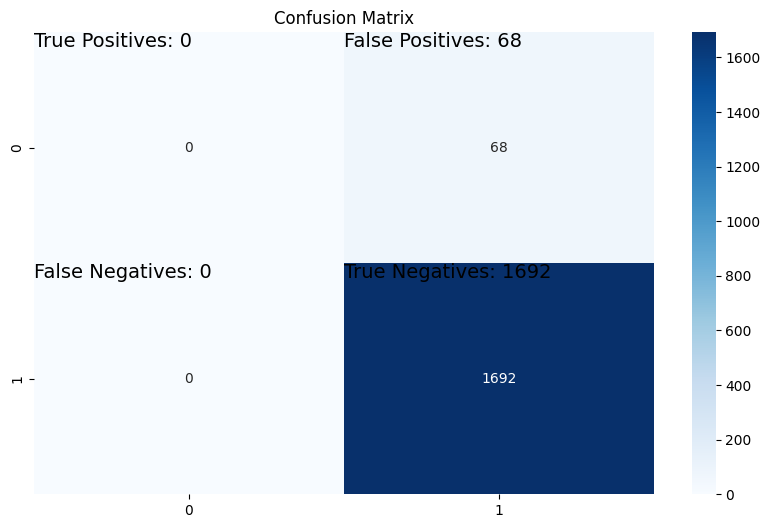

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precisión del modelo DENISSE:
0.0
Precisión del modelo No Denisse:
0.9614
Exactitud del modelo:
0.9614
Sensibilidad del modelo DENISSE:
0.0
Sensibilidad del modelo No Denisse:
1.0
F1 Score del modelo DENISSE:
0.0
F1 Score del modelo No Denisse:
0.9803


In [155]:
#Volvemos variables a dicotómicas
denisse = dfc['usuario'].replace(['nicolas', 'AUSTIN', 'LEONARDO', 'IKER BENJAMIN', 'KYTZIA',
       'YAEL DAVID', 'ERICK OSVALDO', 'SERGIO ANGEL', 'erick ', 'CONCEPCION',
       'JOSHUA', 'VALENTIN', 'CARLOS ENRIQUE', 'JOSE IAN', 'INGRID', 'CARLOS ABEL', 'jesus eduardo',
       'ramiro isai', 'RENE ', 'JOSE IGNACIO TADEO', 'JESUS ALEJANDRO',
       'ARLETT', 'ASHLEY ', 'BENJAMIN', 'IRVING ', 'YEREMI YAZMIN ',
       'ADRIAN ', 'ALEIDA', 'NICOLAS |', 'LEONARDO ', 'JOSE JAVIER ',
       'MA DEL ROSARIO ', 'ESMERALDA'], 'No Denisse')


#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep = dfn[['mini juego', 'juego', 'número de interacción por lección', 'administrador']]
Var_Dep = denisse

usuario_denisse = analisis_metricas(Vars_Indep, Var_Dep)
usuario_denisse

### Arlett

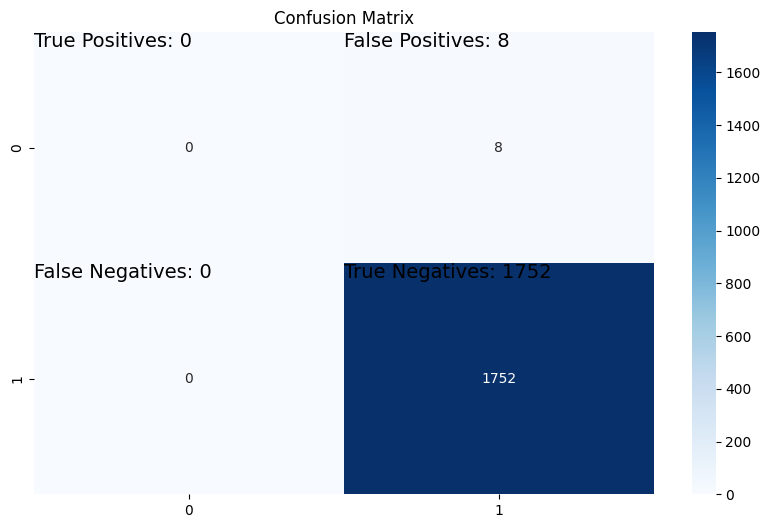

Precisión del modelo ARLETT:
0.0
Precisión del modelo No Denisse:
0.9955
Exactitud del modelo:
0.9955
Sensibilidad del modelo ARLETT:
0.0
Sensibilidad del modelo No Denisse:
1.0
F1 Score del modelo ARLETT:
0.0
F1 Score del modelo No Denisse:
0.9977


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [156]:
#Volvemos variables a dicotómicas
arlett = dfc['usuario'].replace(['nicolas', 'AUSTIN', 'LEONARDO', 'IKER BENJAMIN', 'KYTZIA',
       'YAEL DAVID', 'ERICK OSVALDO', 'SERGIO ANGEL', 'erick ', 'CONCEPCION',
       'JOSHUA', 'VALENTIN', 'CARLOS ENRIQUE', 'JOSE IAN', 'INGRID', 'CARLOS ABEL', 'jesus eduardo',
       'ramiro isai', 'RENE ', 'JOSE IGNACIO TADEO', 'JESUS ALEJANDRO',
       'DENISSE', 'ASHLEY ', 'BENJAMIN', 'IRVING ', 'YEREMI YAZMIN ',
       'ADRIAN ', 'ALEIDA', 'NICOLAS |', 'LEONARDO ', 'JOSE JAVIER ',
       'MA DEL ROSARIO ', 'ESMERALDA'], 'No Denisse')


#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep = dfn[['mini juego', 'juego', 'número de interacción por lección', 'administrador']]
Var_Dep = arlett

usuario_arlett = analisis_metricas(Vars_Indep, Var_Dep)
usuario_arlett

### Joshua

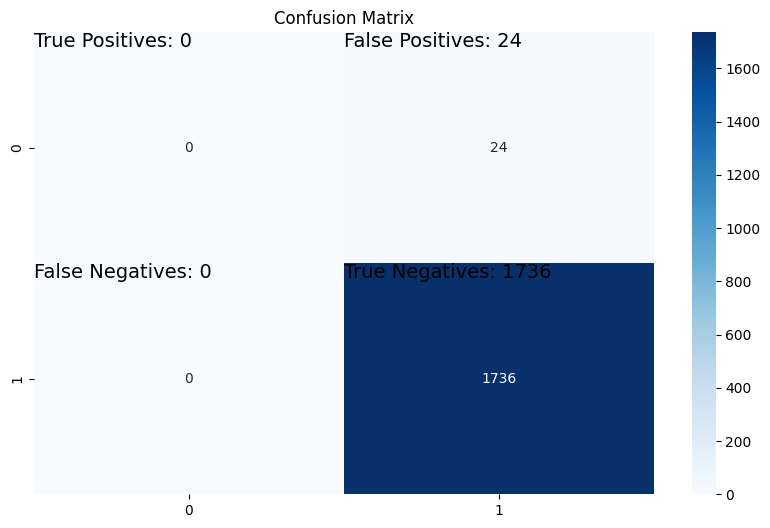

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precisión del modelo JOSHUA:
0.0
Precisión del modelo No Denisse:
0.9864
Exactitud del modelo:
0.9864
Sensibilidad del modelo JOSHUA:
0.0
Sensibilidad del modelo No Denisse:
1.0
F1 Score del modelo JOSHUA:
0.0
F1 Score del modelo No Denisse:
0.9931


In [157]:
#Volvemos variables a dicotómicas
joshua = dfc['usuario'].replace(['nicolas', 'AUSTIN', 'LEONARDO', 'IKER BENJAMIN', 'KYTZIA',
       'YAEL DAVID', 'ERICK OSVALDO', 'SERGIO ANGEL', 'erick ', 'CONCEPCION',
       'ARLETT', 'VALENTIN', 'CARLOS ENRIQUE', 'JOSE IAN', 'INGRID', 'CARLOS ABEL', 'jesus eduardo',
       'ramiro isai', 'RENE ', 'JOSE IGNACIO TADEO', 'JESUS ALEJANDRO',
       'DENISSE', 'ASHLEY ', 'BENJAMIN', 'IRVING ', 'YEREMI YAZMIN ',
       'ADRIAN ', 'ALEIDA', 'NICOLAS |', 'LEONARDO ', 'JOSE JAVIER ',
       'MA DEL ROSARIO ', 'ESMERALDA'], 'No Denisse')


#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep = dfn[['mini juego', 'juego', 'número de interacción por lección', 'administrador']]
Var_Dep = joshua

usuario_joshua = analisis_metricas(Vars_Indep, Var_Dep)
usuario_joshua

## Tabla Coeficientes Métricas

In [159]:
# Crear un diccionario con las métricas detalladas para cada modelo
metricas_comparativas = {
    "Modelo": [
        "Botón Correcto", "Juego", "Auto Push", "Color Blue", "Color Green", 
        "Color Red", "Color Violet", "Color Yellow", "Dificultad Episodio 3", 
        "Mini Juego Asteroides", "Mini Juego Sonidos y Animales", 
        "Número de Interacciones: 4", "Usuario Rene", "Usuario Erick Osvaldo", 
        "Usuario Denisse", "Usuario Arlett", "Usuario Joshua"
    ],
    "Precisión 1": [
        0.6866, 1.0, 0.492, 0.3915, 0.3753, 0.496, 0.8481, 0.3824, 0.8968, 0.7479, 0.7336, 0.4449, 0.4949, 0.4918, 0.4804, 0.498, 0.4949
    ],
    "Precisión 2": [
        0.654, 1.0, 0.5, 0.5, 0.5, 0.5, 0.5518, 0.5, 0.5014, 0.5975, 0.5221, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5
    ],
    "Exactitud": [
        0.671, 1.0, 0.9841, 0.783, 0.7506, 0.992, 0.7585, 0.7648, 0.7937, 0.8347, 0.8642, 0.8898, 0.9898, 0.9835, 0.9608, 0.996, 0.9898
    ],
    "Sensibilidad 1": [
        0.654, 1.0, 0.5, 0.5, 0.5, 0.5, 0.5518, 0.5, 0.5014, 0.5975, 0.5221, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5
    ],
    "Sensibilidad 2": [
        0.6481, 1.0, 0.496, 0.4391, 0.4288, 0.498, 0.5243, 0.4334, 0.4452, 0.6184, 0.5089, 0.4708, 0.4974, 0.4958, 0.49, 0.499, 0.4974
    ],
    "F1-Score 1": [
        0.6481, 1.0, 0.496, 0.4391, 0.4288, 0.498, 0.5243, 0.4334, 0.4452, 0.6184, 0.5089, 0.4708, 0.4974, 0.4958, 0.49, 0.499, 0.4974
    ],
    "F1-Score 2": [
        0.654, 1.0, 0.5, 0.5, 0.5, 0.5, 0.5518, 0.5, 0.5014, 0.5975, 0.5221, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5
    ]
}

# Crear un DataFrame con las métricas comparativas
tabla_comparativa = pd.DataFrame(metricas_comparativas)
tabla_comparativa

,Modelo,Precisión 1,Precisión 2,Exactitud,Sensibilidad 1,Sensibilidad 2,F1-Score 1,F1-Score 2
0,Botón Correcto,0.6866,0.6540,0.6710,0.6540,0.6481,0.6481,0.6540
1,Juego,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,Auto Push,0.4920,0.5000,0.9841,0.5000,0.4960,0.4960,0.5000
3,Color Blue,0.3915,0.5000,0.7830,0.5000,0.4391,0.4391,0.5000
4,Color Green,0.3753,0.5000,0.7506,0.5000,0.4288,0.4288,0.5000
5,Color Red,0.4960,0.5000,0.9920,0.5000,0.4980,0.4980,0.5000
6,Color Violet,0.8481,0.5518,0.7585,0.5518,0.5243,0.5243,0.5518
7,Color Yellow,0.3824,0.5000,0.7648,0.5000,0.4334,0.4334,0.5000
8,Dificultad Episodio 3,0.8968,0.5014,0.7937,0.5014,0.4452,0.4452,0.5014
9,Mini Juego Asteroides,0.7479,0.5975,0.8347,0.5975,0.6184,0.6184,0.5975
